In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import linregress

In [3]:
GDP_csv = pd.read_csv("GDP.clean")
GDP_df = pd.DataFrame(GDP_csv)

home_ownership_csv = pd.read_csv("Homeownership_ACS.clean")
home_ownership_df = pd.DataFrame(home_ownership_csv)

In [4]:
del GDP_df['Unnamed: 0']
GDP_df.head()

,County,GDP
0,"Autauga, AL",1539406.0
1,"Baldwin, AL",6436107.0
2,"Barbour, AL",743779.0
3,"Bibb, AL",322307.0
4,"Blount, AL",819608.0


In [5]:
del home_ownership_df['Unnamed: 0']
home_ownership_df.head()

,HOR,County
0,73.3,"Autauga, AL"
1,72.9,"Baldwin, AL"
2,62.5,"Barbour, AL"
3,75.4,"Bibb, AL"
4,78.5,"Blount, AL"


In [7]:
home_ownership_df  = home_ownership_df.rename(columns={"County": "county"})

In [8]:
GDP_df = GDP_df.rename(columns={"County": "county"})

In [9]:
sample_home_ownership = home_ownership_df.sample(n=650)
sample_home_ownership = sample_home_ownership.reset_index(drop=True)
sample_home_ownership.head()

,HOR,county
0,62.8,"Jackson, SD"
1,67.4,"Sevier, TN"
2,70.6,"Bonneville, ID"
3,76.9,"Clearfield, PA"
4,59.6,"Dallam, TX"


In [11]:
GDP_analysis = sample_home_ownership.merge(GDP_df, on="county")
GDP_analysis.head()

,HOR,county,GDP
0,62.8,"Jackson, SD",68005.0
1,67.4,"Sevier, TN",3858571.0
2,70.6,"Bonneville, ID",4687404.0
3,76.9,"Clearfield, PA",2435232.0
4,59.6,"Dallam, TX",537272.0


In [12]:
len(GDP_analysis)

622

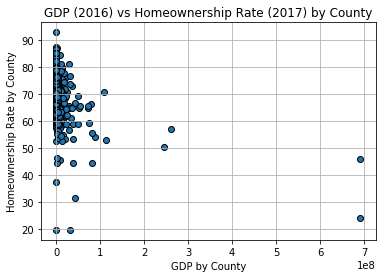

In [13]:
plt.scatter(GDP_analysis["GDP"], GDP_analysis["HOR"], marker="o", edgecolor='black')
plt.title("GDP (2016) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate by County")
plt.xlabel("GDP by County")
plt.grid(True)
plt.savefig('Pictures/GDP_scatter.png')

In [14]:
x = GDP_analysis["GDP"]
y = GDP_analysis["HOR"]
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    HOR   R-squared (uncentered):                   0.019
Model:                            OLS   Adj. R-squared (uncentered):              0.017
Method:                 Least Squares   F-statistic:                              11.84
Date:                Sun, 08 Sep 2019   Prob (F-statistic):                    0.000619
Time:                        10:38:08   Log-Likelihood:                         -3535.6
No. Observations:                 622   AIC:                                      7073.
Df Residuals:                     621   BIC:                                      7078.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP         2.241e-07   6.51e-08      3.441      0.001    9.62e-08    3.52e-07
==============================================================================
Omnibus:                      871.504   Durbin-Watson:                   0.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           193601.133
Skew:                          -7.386   Prob(JB):                         0.00
Kurtosis:                      88.158   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

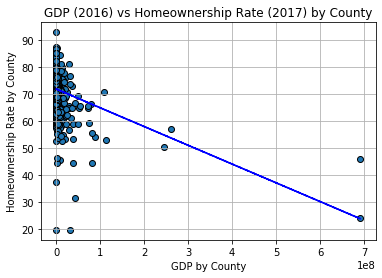

In [16]:
plt.scatter(GDP_analysis["GDP"], GDP_analysis["HOR"], marker="o", edgecolor='black')
plt.title("GDP (2016) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate by County")
plt.xlabel("GDP by County")
plt.grid(True)
plt.plot(x, fit, 'b--')
plt.savefig('Pictures/GDP_regression.png')